In [1]:
# Import libraries
import pandas as pd

# Load the dataset
file_path = '/Users/toshialockhart/Desktop/student predictions dropout success.csv'
data = pd.read_csv(file_path)

# Displaty basic information and first few rows
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

(None,
    Marital status  Application mode  Application order  Course  \
 0               1                 8                  5       2   
 1               1                 6                  1      11   
 2               1                 1                  5       5   
 3               1                 8                  2      15   
 4               2                12                  1       3   
 
    Daytime/evening attendance  Previous qualification  Nacionality  \
 0                           1                       1            1   
 1                           1                       1            1   
 2                           1                       1            1   
 3                           1                       1            1   
 4                           0                       1            1   
 
    Mother's qualification  Father's qualification  Mother's occupation  ...  \
 0                      13                      10                    6  ...   
 

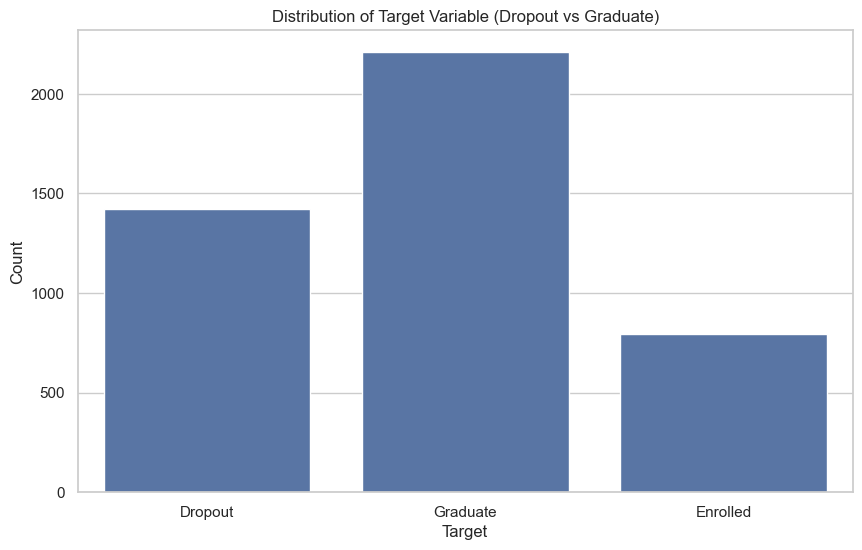

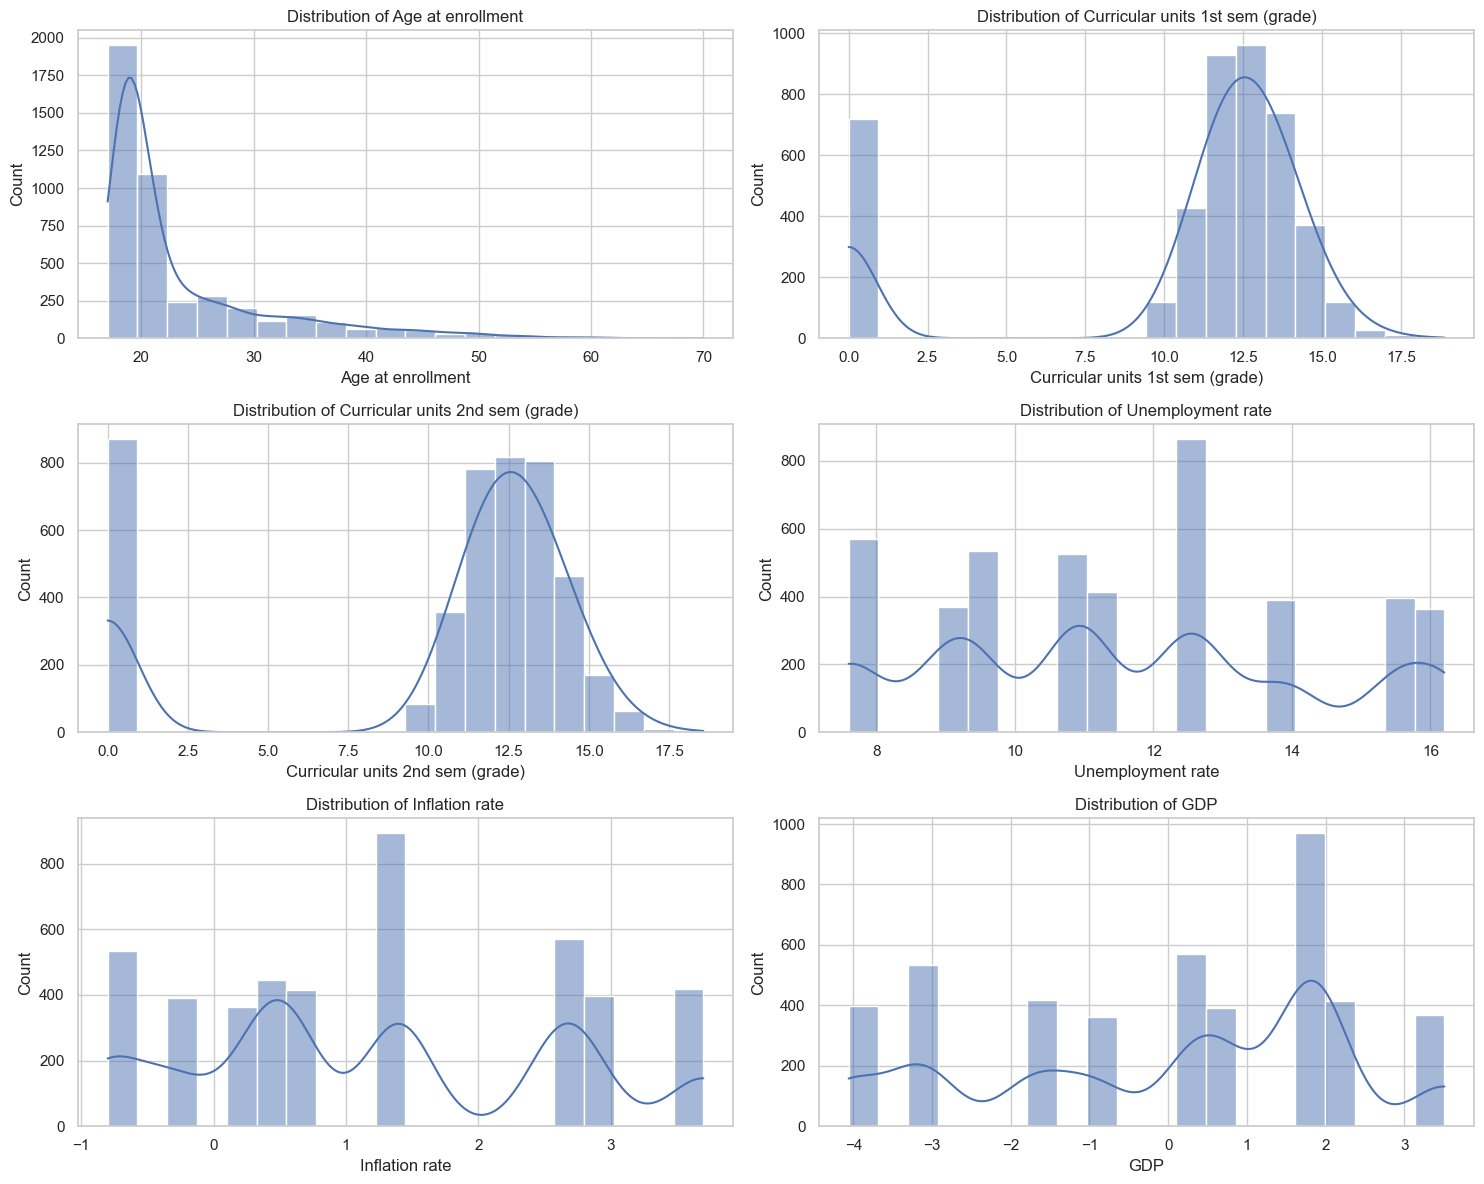

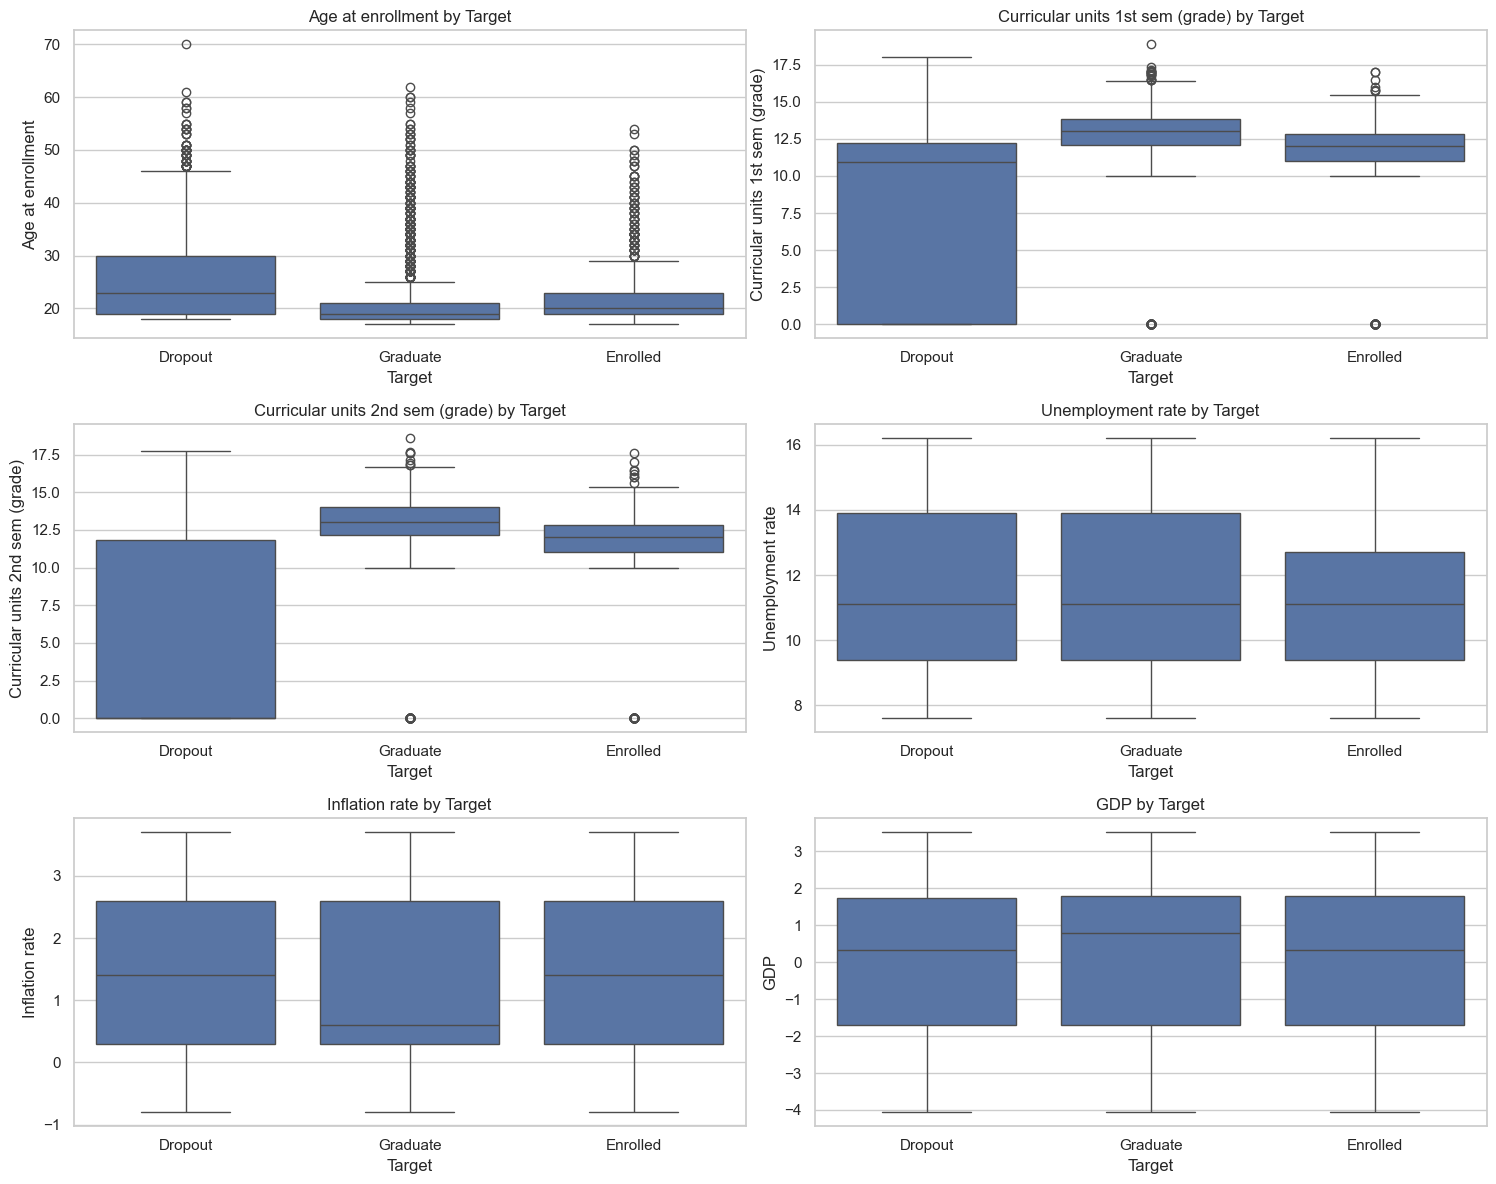

(       Marital status  Application mode  Application order       Course  \
 count     4424.000000       4424.000000        4424.000000  4424.000000   
 mean         1.178571          6.886980           1.727848     9.899186   
 std          0.605747          5.298964           1.313793     4.331792   
 min          1.000000          1.000000           0.000000     1.000000   
 25%          1.000000          1.000000           1.000000     6.000000   
 50%          1.000000          8.000000           1.000000    10.000000   
 75%          1.000000         12.000000           2.000000    13.000000   
 max          6.000000         18.000000           9.000000    17.000000   
 
        Daytime/evening attendance  Previous qualification  Nacionality  \
 count                 4424.000000             4424.000000  4424.000000   
 mean                     0.890823                2.531420     1.254521   
 std                      0.311897                3.963707     1.748447   
 min          

In [2]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualization environment
sns.set(style="whitegrid")

# Basic statistical overview for numerical columns
numeric_summary = data.describe()

# Count distribution of the target variable
target_counts = data['Target'].value_counts()

# Plotting distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Variable (Dropout vs Graduate)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Select few key variables for exploratory analysis
key_variables = ['Age at enrollment', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)', 'Unemployment rate', 'Inflation rate', 'GDP']

# Histograms for selected numeric variables
plt.figure(figsize=(15, 12))
for i, column in enumerate(key_variables, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# Boxplot to show distributions in relation to target
plt.figure(figsize=(15, 12))
for i, column in enumerate(key_variables, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='Target', y=column, data=data)
    plt.title(f'{column} by Target')
plt.tight_layout()
plt.show()

numeric_summary, target_counts

In [3]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Exclude "Enrolled" students to focus on dropout vs graduate classifications
data_filtered = data[data['Target'] != 'Enrolled'].copy()

# Encode target variable: Dropout = 1, Graduate = 0
label_encoder = LabelEncoder()
data_filtered['Target'] = label_encoder.fit_transform(data_filtered['Target'])

# Identify categorical features based on context (nominal encoded numerically)
categorical_features = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance',
                        'Previous qualification', 'Nacionality', 'Mother\'s qualification',
                        'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation',
                        'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date',
                        'Gender', 'Scholarship holder', 'International']

# Convert categorical features using one-hot encoding
data_encoded = pd.get_dummies(data_filtered, columns=categorical_features, drop_first=True)

# Define predictors (X) and target (y)
X = data_encoded.drop('Target', axis=1)
y = data_encoded['Target']

# Split dataset into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2541, 227), (1089, 227), (2541,), (1089,))

In [4]:
# Import necessary model and metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Step 1: Fit baseline decision tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

# Step 2: Evaluate baseline model
print("Initial Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 3: Define hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Step 4: Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Step 5: Evaluate best model
best_model = grid_search.best_estimator_
y_best_pred = best_model.predict(X_test)

print("\nBest Model Parameters:", grid_search.best_params_)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred))
print("Tuned Model Classification Report:\n", classification_report(y_test, y_best_pred))
print("Tuned Model Confusion Matrix:\n", confusion_matrix(y_test, y_best_pred))

Initial Decision Tree Accuracy: 0.8650137741046832
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.83       426
           1       0.89      0.89      0.89       663

    accuracy                           0.87      1089
   macro avg       0.86      0.86      0.86      1089
weighted avg       0.86      0.87      0.86      1089

Confusion Matrix:
 [[349  77]
 [ 70 593]]

Best Model Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Tuned Model Accuracy: 0.8650137741046832
Tuned Model Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.81      0.86       426
           1       0.89      0.95      0.92       663

    accuracy                           0.90      1089
   macro avg       0.90      0.88      0.89      1089
weighted avg       0.90      0.90      0.90      1089

Tuned Model Confusion Matrix:
 [[347  79]
 

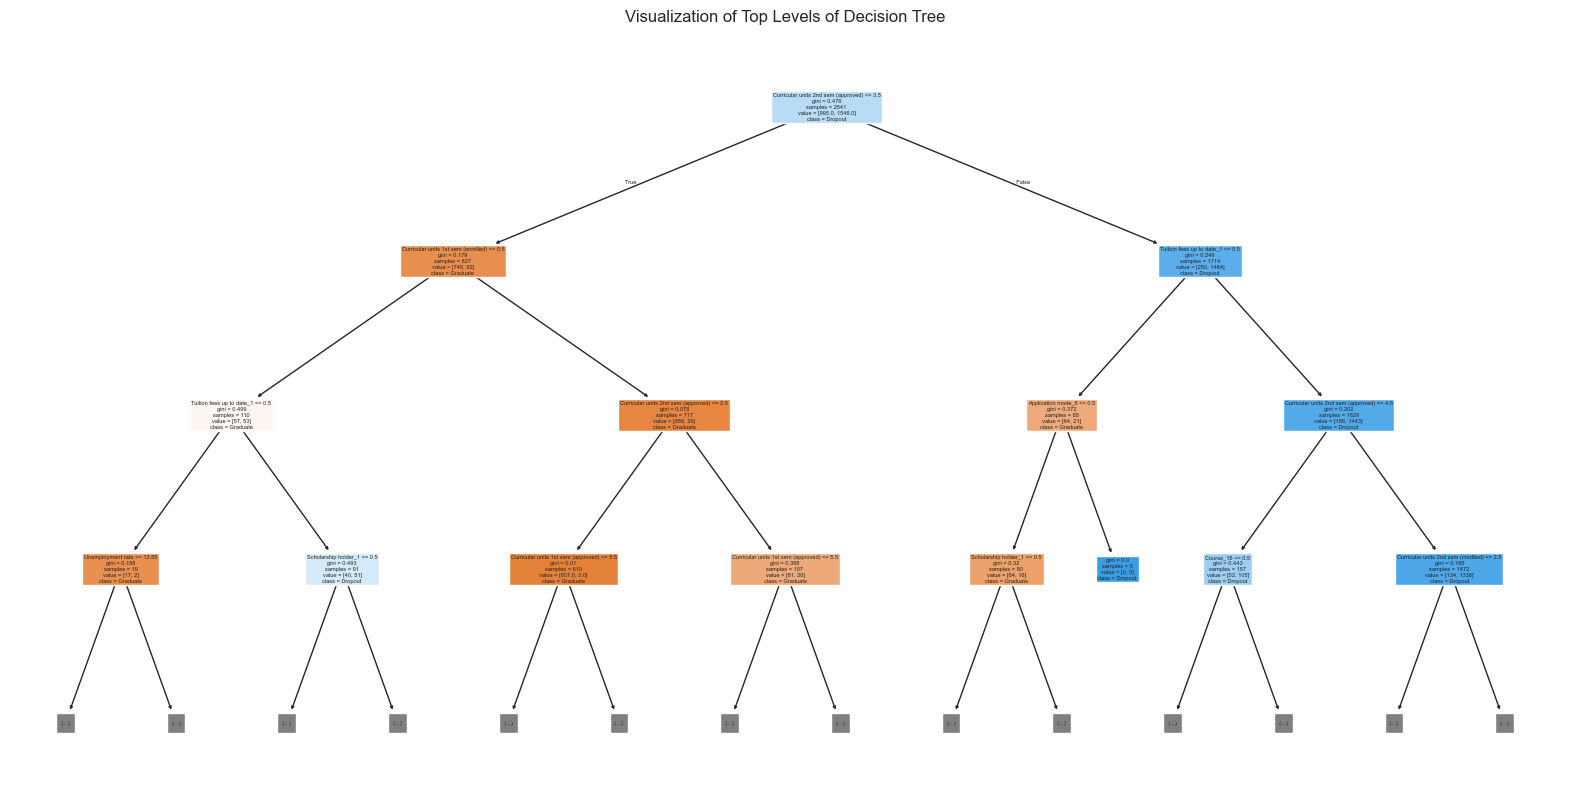

In [5]:
# Visualize the final Decision Tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Graduate', 'Dropout'], max_depth=3)
plt.title("Visualization of Top Levels of Decision Tree")
plt.show()

Best Model Parameters:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


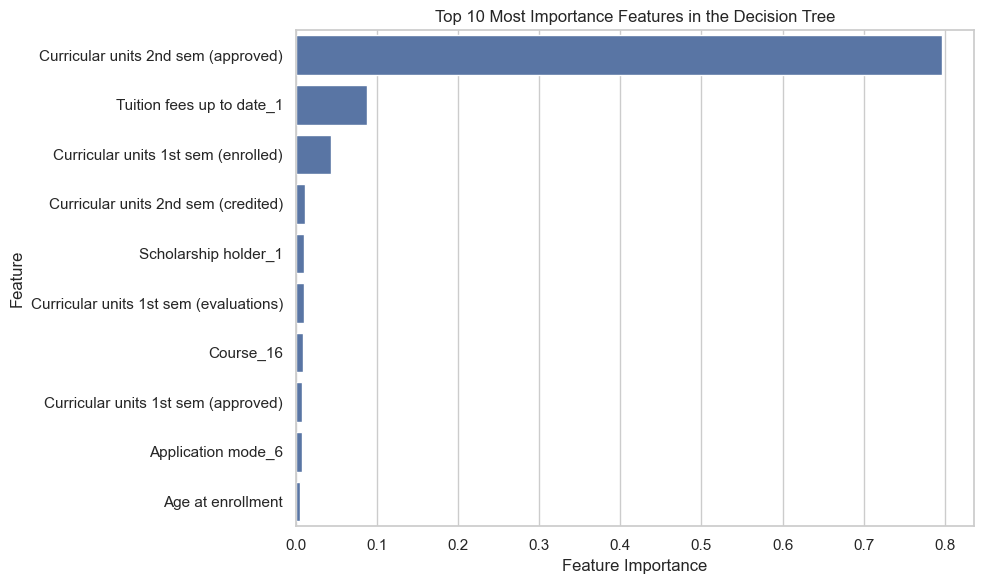

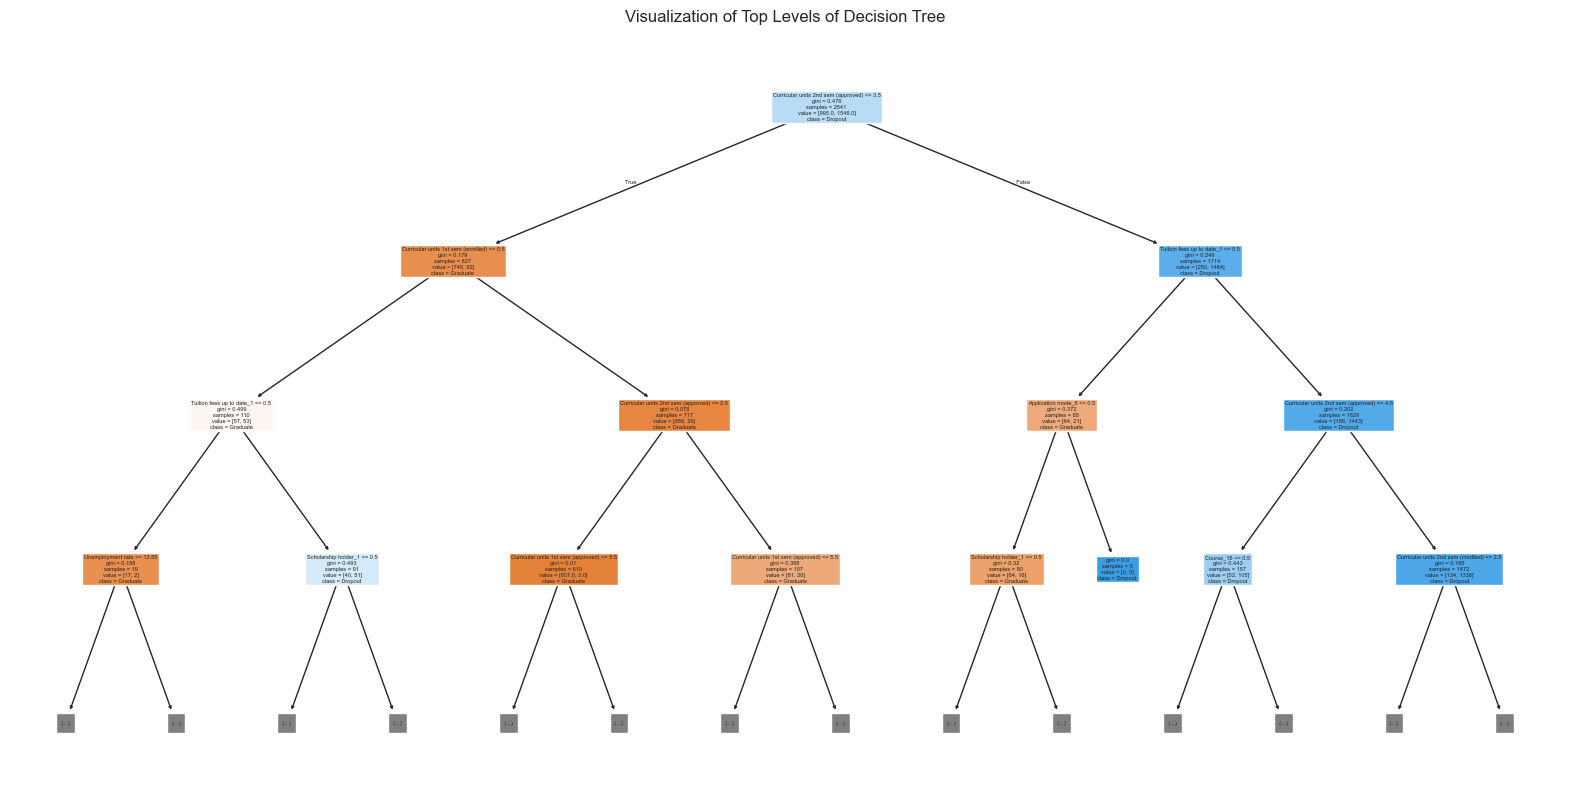

In [6]:
# Summarize model properties
print("Best Model Parameters:")
print(best_model.get_params())

# Feature importance
importances = best_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot feature importances
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title("Top 10 Most Importance Features in the Decision Tree")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Visualize part of the decision tree (top 3 levels)
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_model,
          feature_names=X.columns,
          class_names=['Graduate', 'Dropout'],
          filled=True,
          max_depth=3)
plt.title("Visualization of Top Levels of Decision Tree")
plt.show()

In [7]:
print(f"Tree Depth: {best_model.get_depth()}")
print(f"Number of Leaves: {best_model.get_n_leaves()}")

Tree Depth: 5
Number of Leaves: 25


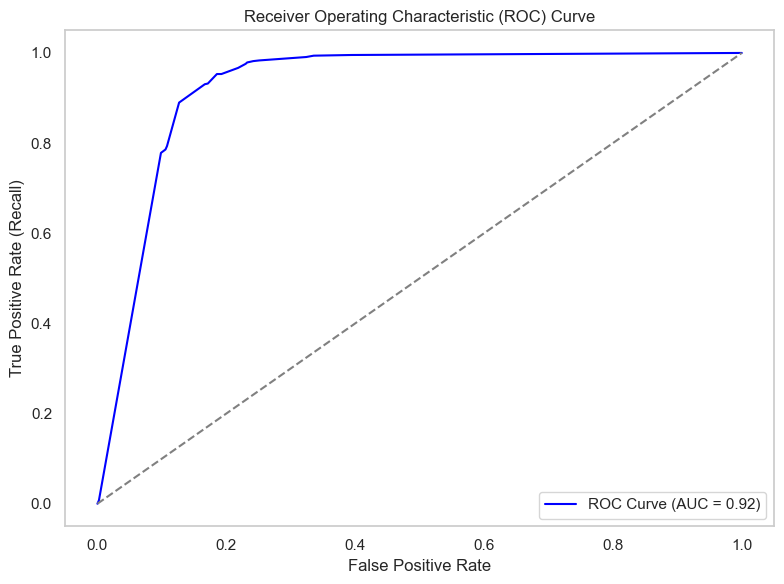

AUC Score: 0.9247


In [8]:
# Import necessary libraries
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the prositive class (Dropout = 1)
y_probs = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Display AUC score separately
print(f"AUC Score: {auc_score:.4f}")

Appendix Code & Outputs

In [9]:
# 1. Display the full classification report
print("Full Classification Report:")
print(classification_report(y_test, best_model.predict(X_test)))

Full Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       426
           1       0.89      0.95      0.92       663

    accuracy                           0.90      1089
   macro avg       0.90      0.88      0.89      1089
weighted avg       0.90      0.90      0.90      1089



In [10]:
# 2. Confusion Matrix (numeric)
print("\n Confusion Matrix (numeric):")
cm = confusion_matrix(y_test, best_model.predict(X_test))
print(cm)


 Confusion Matrix (numeric):
[[347  79]
 [ 31 632]]


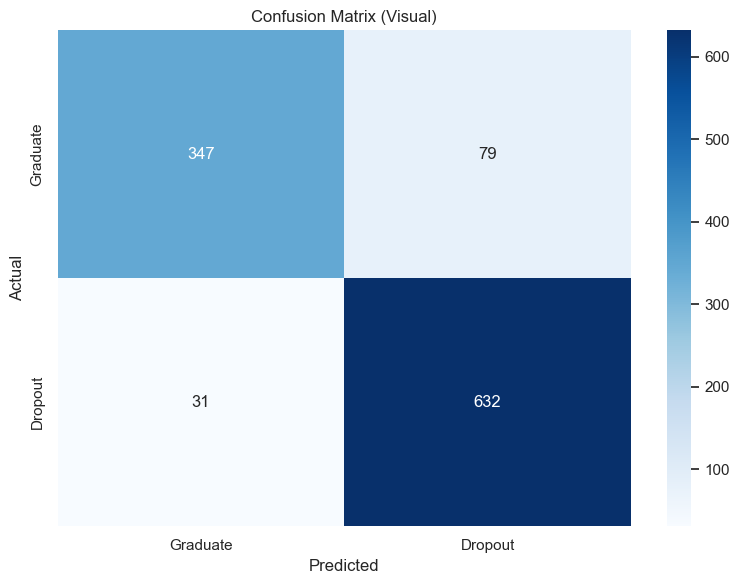

In [14]:
# 2. Confusion Matrix (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Graduate', 'Dropout'], yticklabels=['Graduate', 'Dropout'])
plt.title("Confusion Matrix (Visual)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [12]:
# 4. Feature Importance
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)
print("\n Top 10 Feature Importances:")
print(top_features.to_string(index=False))


 Top 10 Feature Importances:
                               Feature  Importance
   Curricular units 2nd sem (approved)    0.796232
             Tuition fees up to date_1    0.087466
   Curricular units 1st sem (enrolled)    0.043436
   Curricular units 2nd sem (credited)    0.011039
                  Scholarship holder_1    0.009496
Curricular units 1st sem (evaluations)    0.009334
                             Course_16    0.008815
   Curricular units 1st sem (approved)    0.007064
                    Application mode_6    0.007041
                     Age at enrollment    0.004594


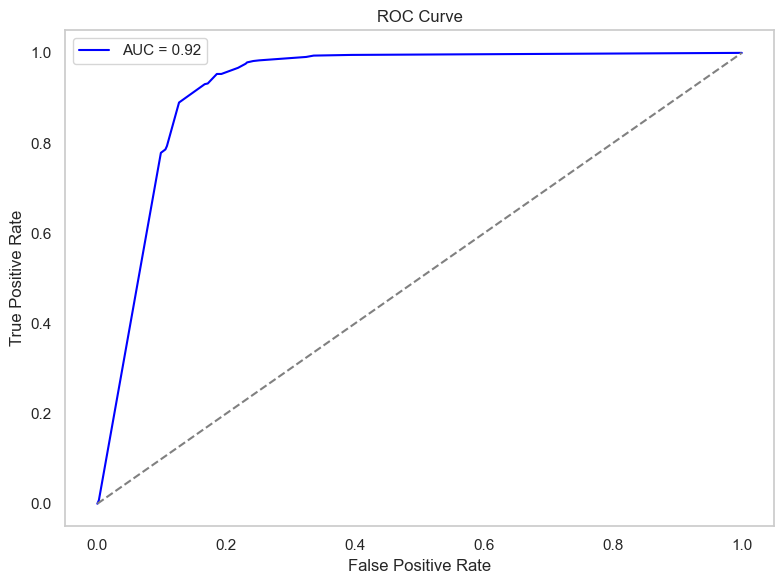


 AUC Score: 0.9247


In [13]:
# 5. ROC Curve
y_probs = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr,tpr, label=f"AUC = {auc_score:.2f}", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print(f"\n AUC Score: {auc_score:.4f}")

In [20]:
# Save to your /data folder
data_filtered.to_csv('/Users/toshialockhart/Desktop/decision_tree_data/student_data_cleaned.csv', index=False)


In [21]:
# Take a random sample of 100 rows
df_sample = data_filtered.sample(n=100, random_state=42)

# Save sample to /data
df_sample.to_csv('/Users/toshialockhart/Desktop/decision_tree_data/student_data_sample.csv', index=False)
